В рамках задачи регрессии нужно предсказать цену телефона, для классификации - операционную систему или год выпуска устройства.
Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
phones = pd.read_csv('phones.csv')
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


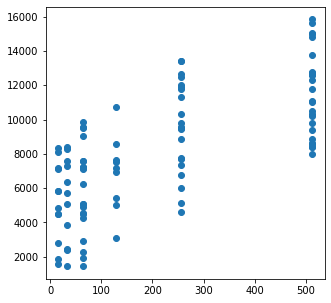

In [10]:
disk = phones['disk']
os = phones['os']
prc = phones['price']
year = phones['year']

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.scatter(disk, prc)

plt.show()

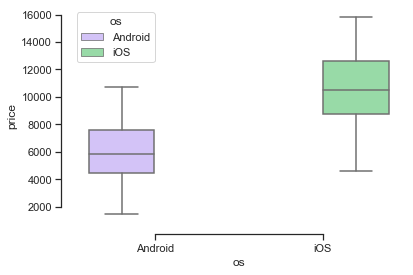

In [21]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="os", y="price",
            hue="os", palette=["m", "g"],
            data=phones)
sns.despine(offset=10, trim=True)

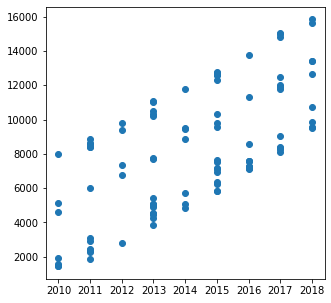

In [12]:
figure = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.scatter(year, prc)

plt.show()

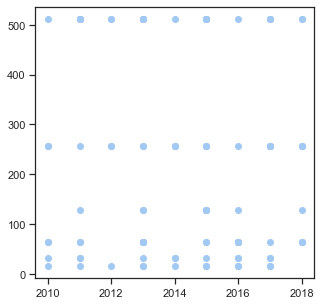

In [22]:
figure = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.scatter(year, disk)

plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

X = phones[['disk', 'year']]
y = phones['price']

reg = LinearRegression().fit(X, y)
a = reg.intercept_
[b1, b2] = reg.coef_

def reg_prediction(disk, year):
    return a + b1*disk + b2*year

reg_prediction(X.disk[0], X.year[0])
reg.predict(X[0:1])[0]

7848.046694419114

In [24]:
from sklearn.ensemble import RandomForestClassifier

y = phones['price']
features = ['disk', 'os', 'year']

X = pd.get_dummies(phones[features])

model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X)